In [418]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [419]:
def plot_decision_boundary(classifier, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
   
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
   
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.9)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="Set1", s=200)


In [420]:
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [421]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [422]:
X = iris['data']

y = iris['target']

In [423]:
df = pd.DataFrame(X)

df.columns =iris['feature_names']

df.columns



Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [425]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [426]:
import sklearn
print(sklearn.__version__)

1.3.0


In [427]:
df.values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [428]:
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [429]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [430]:
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


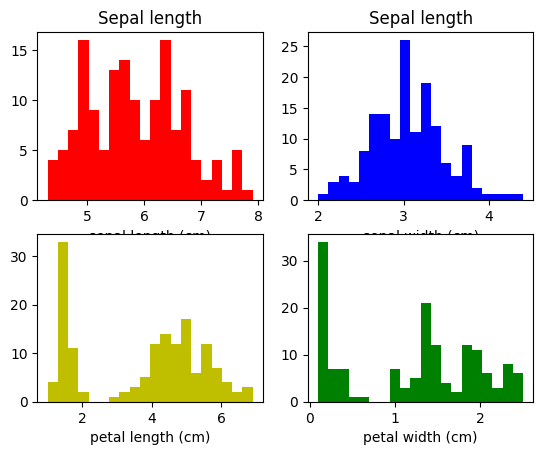

In [431]:
fig, ax = plt.subplots(2, 2)

# Plot data in the top axes
ax[0,0].hist(df["sepal length (cm)"], bins=20, color ='r')
ax[0,1].hist(df["sepal width (cm)"], bins=20, color ='b')
ax[1,0].hist(df["petal length (cm)"], bins=20, color ='y')
ax[1,1].hist(df["petal width (cm)"], bins=20, color ='g')


ax[0,0].set_xlabel("sepal length (cm)")
ax[0,0].set_title("Sepal length")
ax[0,1].set_xlabel("sepal width (cm)")
ax[0,1].set_title("Sepal length")
ax[1,0].set_xlabel("petal length (cm)")
ax[0,0].set_title("Sepal length")
ax[1,1].set_xlabel("petal width (cm)")
ax[0,0].set_title("Sepal length")

plt.show()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

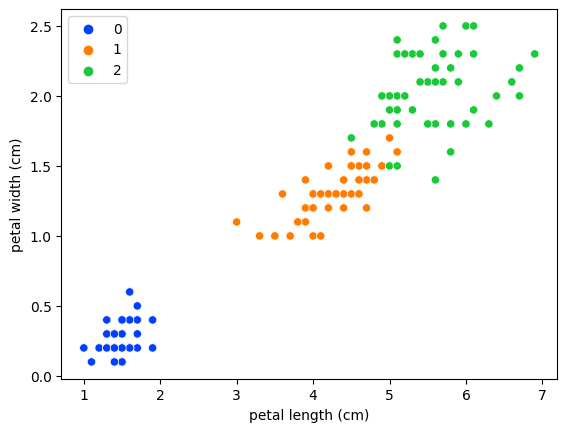

In [432]:
import seaborn as sns
sns.scatterplot(data=df, x="petal length (cm)", y="petal width (cm)", hue=y, palette="bright")

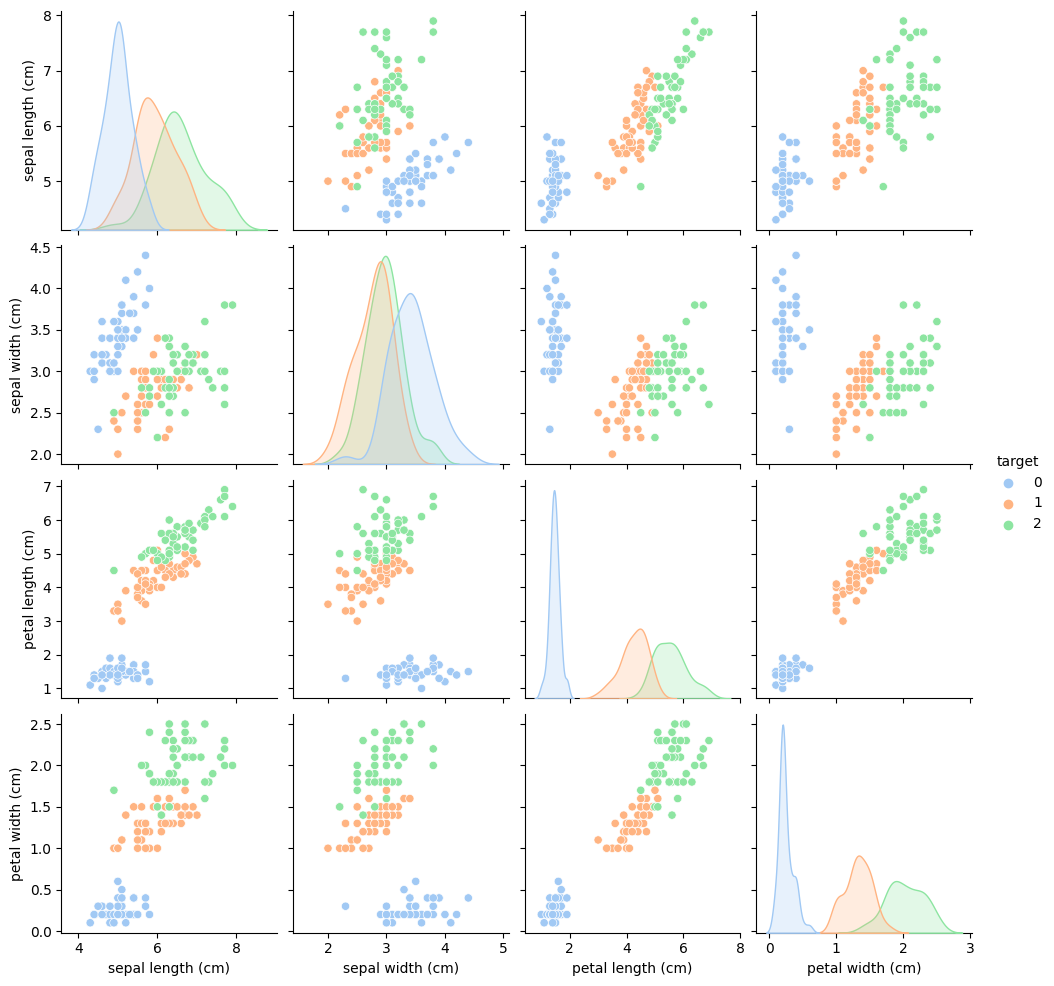

In [433]:
df['target'] = y

sns.pairplot(df, hue='target', palette="pastel")

In [434]:
corr=df.corr()
print(corr)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


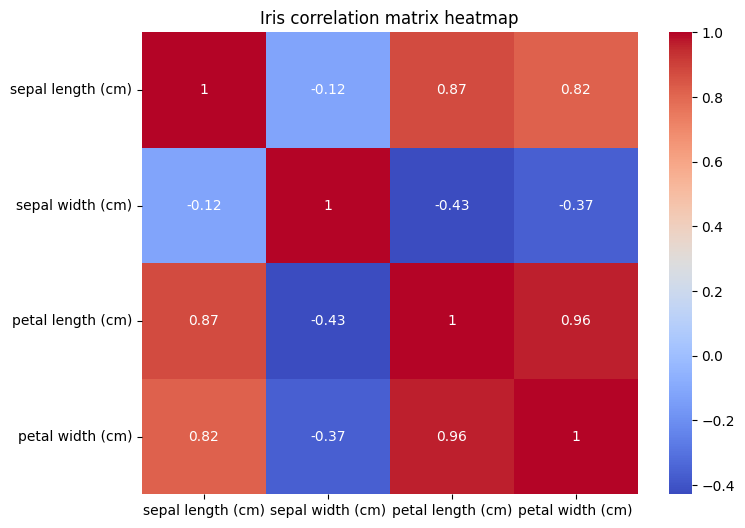

In [435]:
df_copy = df.drop(columns=['target'])
corr = df_copy.corr()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Iris correlation matrix heatmap")
plt.show()



<Axes: >

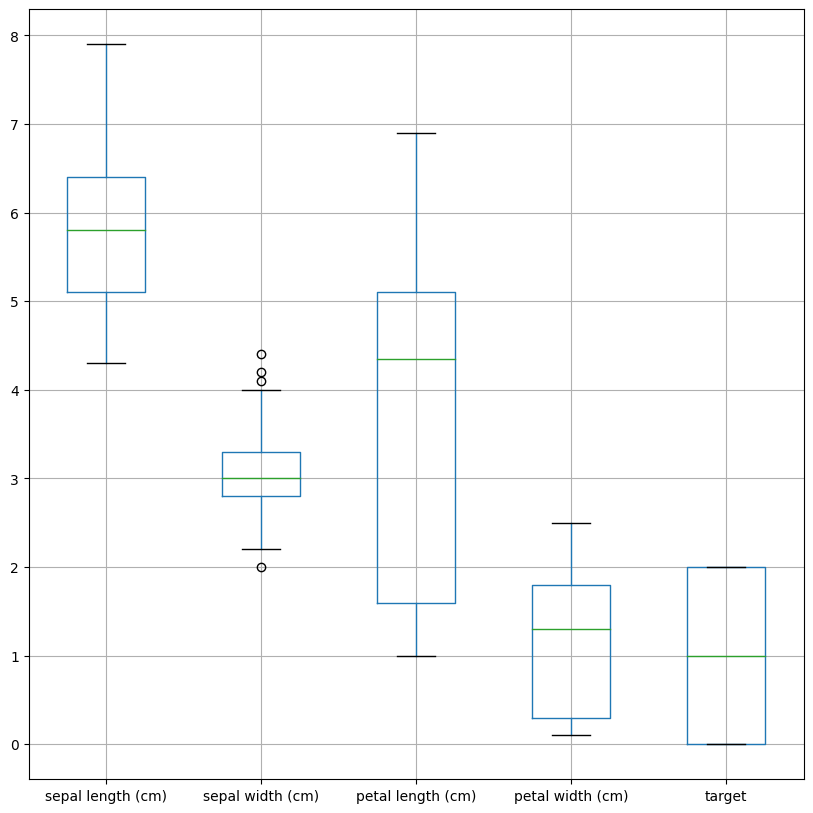

In [436]:
plt.figure(figsize=(10,10))
df.boxplot()

In [437]:
df.duplicated().any()
df.duplicated().sum()
df[df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2


In [438]:
df.drop_duplicates(inplace=True)
df.duplicated().any()
df.duplicated().sum()
df[df.duplicated()]
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [439]:
df['target'].value_counts()

target
0    50
1    50
2    49
Name: count, dtype: int64

In [440]:
from sklearn.model_selection import train_test_split
X = iris['data']
y = iris['target']
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

In [441]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, y_train)
pred=svc_model.predict(X_test)

In [442]:
from sklearn.metrics import classification_report, confusion_matrix
print(metrics.accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

0.9777777777777777
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [443]:
X =df.drop(["petal length (cm)", "petal width (cm)", 'target'], axis=1)
y =df['target']

X_train,X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.20)


In [444]:
y_test.value_counts()

target
2    11
0    10
1     9
Name: count, dtype: int64

In [445]:

svc=SVC(kernel='linear', gamma='auto')
svc.fit(X_train, y_train)
y_predict=svc.predict(X_test)

print("The accuracy score for svm linear kernel is", metrics.accuracy_score(y_test, y_predict))
print("The confusion matrix for svm linear kernel is", confusion_matrix(y_test,y_predict))


The accuracy score for svm linear kernel is 0.8333333333333334
The confusion matrix for svm linear kernel is [[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


In [446]:
X_test= X_test.values

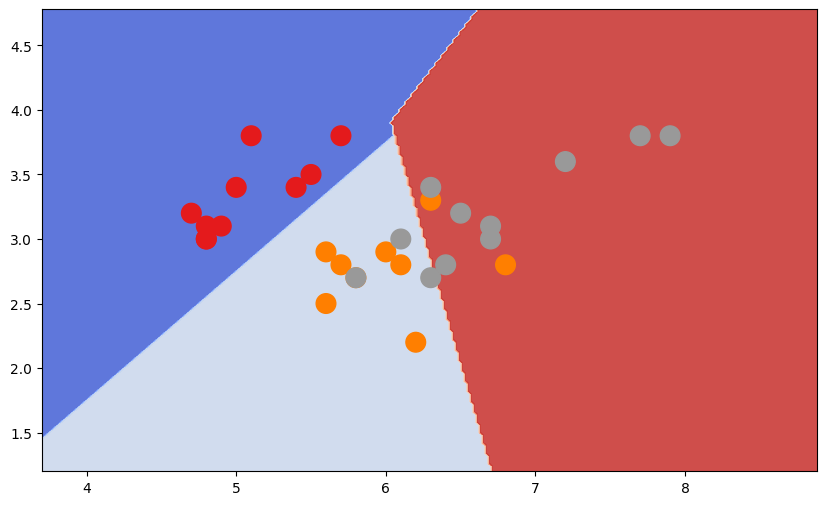

In [447]:
plt.figure(figsize=(10,6))
plot_decision_boundary(svc, X_test, y_test)

The accuracy score for svm polynomial degree 2 kernel is 0.8333333333333334
The confusion matrix for svm polynomial degree 2 kernel is [[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


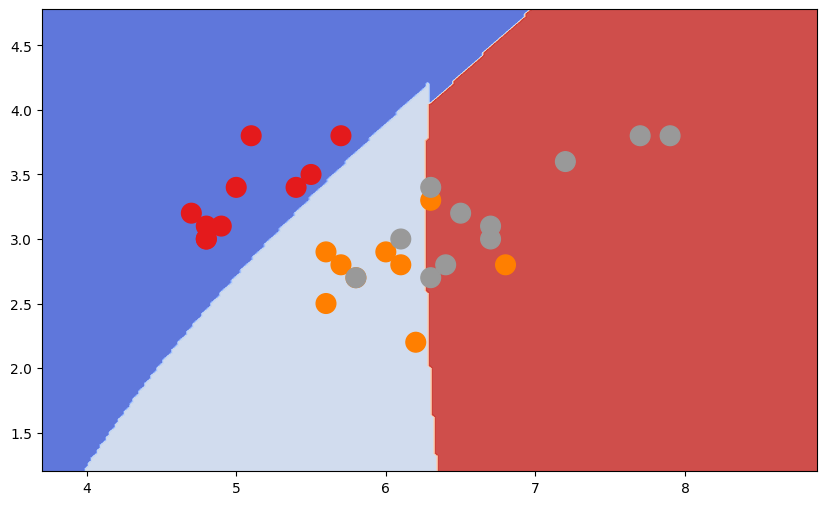

In [448]:

svc2=SVC(kernel='poly', degree=2, gamma='auto')
svc2.fit(X_train, y_train)
y_predict=svc.predict(X_test)

print("The accuracy score for svm polynomial degree 2 kernel is", metrics.accuracy_score(y_test, y_predict))
print("The confusion matrix for svm polynomial degree 2 kernel is", confusion_matrix(y_test,y_predict))


plt.figure(figsize=(10,6))
plot_decision_boundary(svc2, X_test, y_test)

The accuracy score for svm rbf kernel is 0.8333333333333334
The confusion matrix for svm rbf kernel is [[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


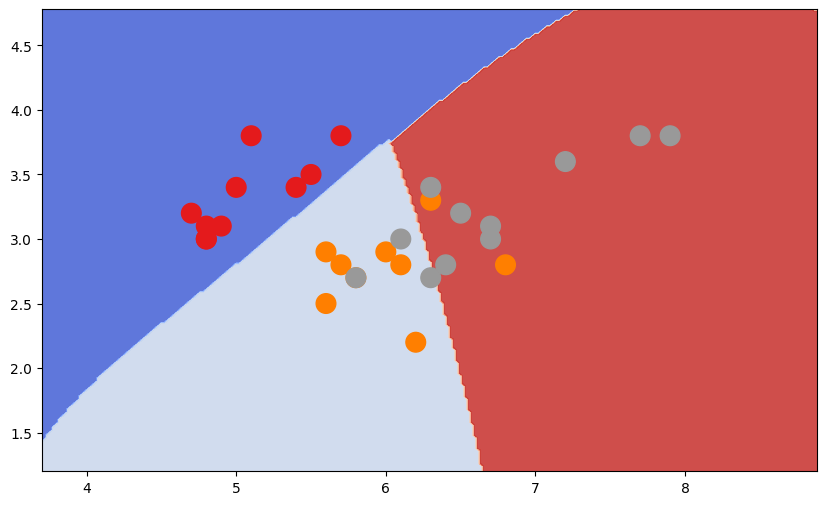

In [449]:

svc3=SVC(kernel='rbf', gamma='auto')
svc3.fit(X_train, y_train)
y_predict=svc.predict(X_test)

print("The accuracy score for svm rbf kernel is", metrics.accuracy_score(y_test, y_predict))
print("The confusion matrix for svm rbf kernel is", confusion_matrix(y_test,y_predict))


plt.figure(figsize=(10,6))
plot_decision_boundary(svc3, X_test, y_test)

The accuracy score for svm sigmoid kernel is 0.8333333333333334
The confusion matrix for svm sigmoid kernel is [[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


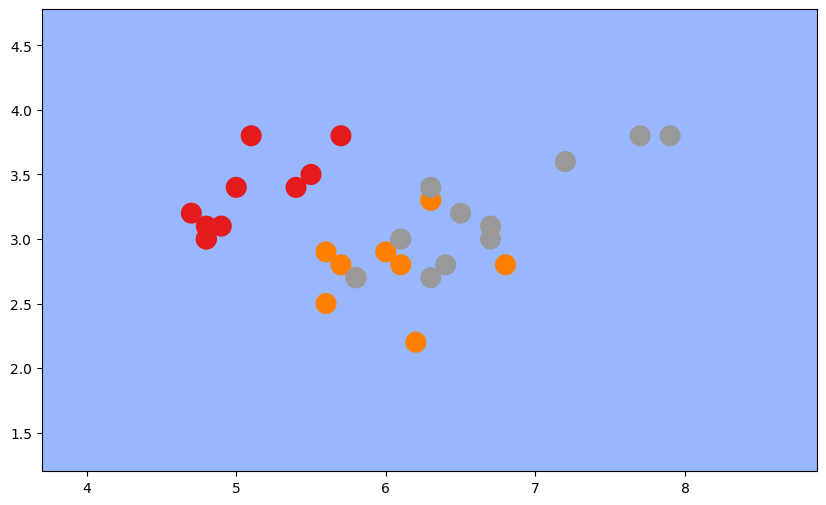

In [450]:

svc4=SVC(kernel='sigmoid', gamma='auto')
svc4.fit(X_train, y_train)
y_predict=svc.predict(X_test)

print("The accuracy score for svm sigmoid kernel is", metrics.accuracy_score(y_test, y_predict))
print("The confusion matrix for svm sigmoid kernel is", confusion_matrix(y_test,y_predict))


plt.figure(figsize=(10,6))
plot_decision_boundary(svc4, X_test, y_test)

In [451]:
a = np.array([[6.3,2.5]])
y_predict = svc2.predict(a)
print(y_predict)

[2]


In [452]:
#Conclusion for SVM model each different type of kernel for liner, polynomial degree 2, rbf, and sigmoid resulting in the same accurancy score of 0.83.
#All of the kernel also have an unclear division of hyperplane to categorize the species in "sepal length (cm)" and "sepal width (cm)".
#Further testing needed to identify which kernel could increase the accuracy score for a better model prediction.